In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

spotify = pd.read_csv('spotify_cleaned.csv')

<Axes: >

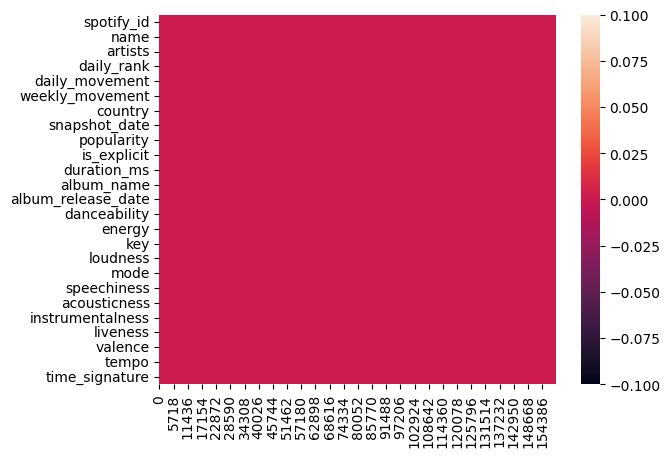

In [4]:
sns.heatmap(spotify.isnull().T)